<a href="https://colab.research.google.com/github/BlackCurrantDS/ATiML-Project/blob/master/Model_Selection_and_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [0]:
train_data = pd.read_csv("features_scaled_train.csv", index_col=0)

In [177]:
train_data.head(1)

,ID,book_lenght,book_sen,book_word,lenght_book,number_sen,number_word,number_of_stop_words,number_of_foreignwords,count_dial_break,noun,verb,adj,ProperNoun,num,Puch,she,he,she_he_ratio,period,comma,colon,semi_colon,exl,q,positive_x,negative_x,neutral,compund,positive_y,negative_y,anger,disgust,fear,sadness,anticipation,joy,surprise,trust,genre
0,214.0,0.277991,0.299471,0.278088,0.277991,0.299471,0.278088,0.535962,0.038124,0.009887,0.527253,0.48169,0.653485,0.0,0.37607,0.598408,0.250728,0.30137,0.107704,0.390218,0.641153,0.699711,0.459219,0.278968,0.453705,0.011573,0.0,0.009859,0.073315,0.349139,1.0,1.0,0.944704,1.0,0.759819,0.580613,0.663251,0.653755,0.47033,Allegories


In [0]:
val_data = pd.read_csv("features_scaled_validation.csv", index_col=0)

In [179]:
val_data.head(1)

,ID,book_lenght,book_sen,book_word,lenght_book,number_sen,number_word,number_of_stop_words,number_of_foreignwords,count_dial_break,noun,verb,adj,ProperNoun,num,Puch,she,he,she_he_ratio,period,comma,colon,semi_colon,exl,q,positive_x,negative_x,neutral,compund,positive_y,negative_y,anger,disgust,fear,sadness,anticipation,joy,surprise,trust,genre
0,199.0,0.089663,0.101551,0.088849,0.089663,0.101551,0.088849,0.743533,0.0,0.180751,0.406176,0.501059,0.483654,0.0,0.24883,0.414924,0.060357,0.068149,0.302392,0.392023,0.488035,0.241019,0.425689,0.202635,0.243198,0.14859,0.0,0.135663,0.430925,0.700794,0.083454,0.17489,0.296394,0.113323,0.621033,0.81326,0.678935,0.134974,0.725664,Allegories


In [0]:
final_test_data = pd.read_csv("features_scaled_test.csv", index_col=0)

In [181]:
final_test_data.head(1)

,ID,book_lenght,book_sen,book_word,lenght_book,number_sen,number_word,number_of_stop_words,number_of_foreignwords,count_dial_break,noun,verb,adj,ProperNoun,num,Puch,she,he,she_he_ratio,period,comma,colon,semi_colon,exl,q,positive_x,negative_x,neutral,compund,positive_y,negative_y,anger,disgust,fear,sadness,anticipation,joy,surprise,trust,genre
0,147.0,0.37945,0.339057,0.360581,0.37945,0.339057,0.360581,0.501097,0.053684,0.144893,0.545683,0.0,1.0,0.0,0.049009,0.309116,0.158018,0.476556,0.158066,0.403872,0.913967,0.020178,0.283141,0.055442,0.091978,0.0,0.0,0.134361,0.431016,0.717646,0.602116,0.612711,0.643977,0.493043,0.504342,0.584063,0.658826,0.296342,0.857841,Ghost and Horror


In [0]:
first_cols = ['ID','genre']#,'Author_Name', 'Book_Name'
last_cols = [col for col in final_test_data.columns if col not in first_cols]

final_test_data = final_test_data[first_cols+last_cols]

In [183]:
final_test_data.head(1)

,ID,genre,book_lenght,book_sen,book_word,lenght_book,number_sen,number_word,number_of_stop_words,number_of_foreignwords,count_dial_break,noun,verb,adj,ProperNoun,num,Puch,she,he,she_he_ratio,period,comma,colon,semi_colon,exl,q,positive_x,negative_x,neutral,compund,positive_y,negative_y,anger,disgust,fear,sadness,anticipation,joy,surprise,trust
0,147.0,Ghost and Horror,0.37945,0.339057,0.360581,0.37945,0.339057,0.360581,0.501097,0.053684,0.144893,0.545683,0.0,1.0,0.0,0.049009,0.309116,0.158018,0.476556,0.158066,0.403872,0.913967,0.020178,0.283141,0.055442,0.091978,0.0,0.0,0.134361,0.431016,0.717646,0.602116,0.612711,0.643977,0.493043,0.504342,0.584063,0.658826,0.296342,0.857841


In [184]:
final_test_data.shape

(79, 40)

In [0]:
X_final_test,y_final_test = final_test_data.values[:,2:], final_test_data.values[:,1]

In [186]:
print("Shape of final_test_data input", X_final_test.shape)
print("Shape of final_test_data output", y_final_test.shape)

Shape of final_test_data input (79, 38)
Shape of final_test_data output (79,)


In [0]:
first_cols = ['ID','genre']#,'Author_Name', 'Book_Name'
last_cols = [col for col in train_data.columns if col not in first_cols]

train_data = train_data[first_cols+last_cols]

In [188]:
train_data.head(1)

,ID,genre,book_lenght,book_sen,book_word,lenght_book,number_sen,number_word,number_of_stop_words,number_of_foreignwords,count_dial_break,noun,verb,adj,ProperNoun,num,Puch,she,he,she_he_ratio,period,comma,colon,semi_colon,exl,q,positive_x,negative_x,neutral,compund,positive_y,negative_y,anger,disgust,fear,sadness,anticipation,joy,surprise,trust
0,214.0,Allegories,0.277991,0.299471,0.278088,0.277991,0.299471,0.278088,0.535962,0.038124,0.009887,0.527253,0.48169,0.653485,0.0,0.37607,0.598408,0.250728,0.30137,0.107704,0.390218,0.641153,0.699711,0.459219,0.278968,0.453705,0.011573,0.0,0.009859,0.073315,0.349139,1.0,1.0,0.944704,1.0,0.759819,0.580613,0.663251,0.653755,0.47033


In [189]:
train_data.shape

(155, 40)

In [0]:
first_cols = ['ID','genre'] #,'Author_Name', 'Book_Name'
last_cols = [col for col in val_data.columns if col not in first_cols]

val_data = val_data[first_cols+last_cols]

In [0]:
X_train,y_train = train_data.values[:,2:], train_data.values[:,1]

In [192]:
from collections import Counter
print(Counter(y_train))

Counter({'Literary': 20, 'Sea and Adventure': 18, 'Allegories': 17, 'Ghost and Horror': 17, 'Christmas Stories': 17, 'Detective and Mystery': 17, 'Western Stories': 17, 'Love and Romance': 16, 'Humorous and Wit and Satire': 16})


In [193]:
print("Shape of training input", X_train.shape)
print("Shape of training output", y_train.shape)

Shape of training input (155, 38)
Shape of training output (155,)


In [0]:
X_val,y_val = val_data.values[:,2:], val_data.values[:,1]

In [195]:
print("Shape of test input", X_val.shape)
print("Shape of test output", y_val.shape)

Shape of test input (80, 38)
Shape of test output (80,)


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA

In [0]:
pca = PCA(n_components=15)
X_train_pca = pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_val_pca = pca.transform(X_val)
X_final_test_pca = pca.transform(X_final_test)

Cross-Validation

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred con

SVC: 0.658006
SGDClassifier: 0.485784
LogisticRegression: 0.520060


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred con

KNN: 0.512897
DecisionTreeClassifier: 0.623810
KNeighborsClassifier: 0.512897
GaussianNB: 0.594752


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1859: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_clas

RandomForestClassifier: 0.656359


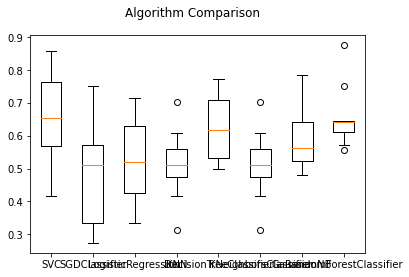

[array([0.8125    , 0.78888889, 0.85714286, 0.6875    , 0.60416667,
        0.66666667, 0.63888889, 0.55555556, 0.41666667, 0.55208333]),
 array([0.54166667, 0.67777778, 0.75      , 0.5625    , 0.33333333,
        0.27380952, 0.33333333, 0.33333333, 0.47916667, 0.57291667]),
 array([0.58333333, 0.34444444, 0.71428571, 0.64583333, 0.41666667,
        0.52380952, 0.51388889, 0.33333333, 0.45833333, 0.66666667]),
 array([0.5625    , 0.47222222, 0.60714286, 0.52083333, 0.3125    ,
        0.70238095, 0.41666667, 0.55555556, 0.47916667, 0.5       ]),
 array([0.6875    , 0.61111111, 0.71428571, 0.52083333, 0.5       ,
        0.52380952, 0.625     , 0.55555556, 0.77083333, 0.72916667]),
 array([0.5625    , 0.47222222, 0.60714286, 0.52083333, 0.3125    ,
        0.70238095, 0.41666667, 0.55555556, 0.47916667, 0.5       ]),
 array([0.5625    , 0.75555556, 0.78571429, 0.5625    , 0.47916667,
        0.66666667, 0.56944444, 0.55555556, 0.5       , 0.51041667]),
 array([0.75      , 0.64444444, 0.

In [198]:
# function to perfrom cross validation


from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import time
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import balanced_accuracy_score
from collections import Counter
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.svm import SVC
from sklearn import metrics, model_selection, svm
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier,
                              GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, VotingClassifier)
from sklearn.metrics import log_loss, fbeta_score, make_scorer, confusion_matrix, roc_curve

def eve_clf():
    start = time.time()
    X,y = X_train_pca, y_train
    #X_tr, X_ts, y_tr, y_ts = train_test_split(X,y, test_size=0.3, random_state=11,stratify=y, shuffle = True)

    #print("shape of y_tr is:",Counter(y_tr))
    num_folds = 10
    scoring = "balanced_accuracy"
    # Spot Check Algorithms
    models = []
    models.append(('SVC', SVC()))
    models.append(('SGDClassifier', SGDClassifier()))
    models.append(('LogisticRegression', LogisticRegression()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
    models.append(('KNeighborsClassifier', KNeighborsClassifier()))
    models.append(('GaussianNB', GaussianNB()))
    models.append(('RandomForestClassifier', RandomForestClassifier()))


    results = []
    names = []
    seed = 7
    for name, model in models:
        kfold = model_selection.KFold(n_splits=num_folds,random_state =seed)
        cv_results = cross_val_score(model, X, y, cv=kfold,scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f" % (name, cv_results.mean())
        print(msg)

    fig = plt.figure()
    fig.suptitle('Algorithm Comparison')
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()
    return results
    
eve_clf()
    



# Hyper parameter tuning of SVC

In [199]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
# define dataset
X, y = X_train_pca,y_train
# define model and parameters
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='balanced_accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.688889 using {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.661111 (0.092240) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.687037 (0.079198) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.520370 (0.090134) with: {'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.655556 (0.098758) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.688889 (0.080635) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.520370 (0.093496) with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.546296 (0.125120) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.650000 (0.109385) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.503704 (0.120811) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.231481 (0.079973) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.127778 (0.038356) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.198148 (0.068318) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.111111 (0.000000) with: {'C': 0.01, 'gamma': 'scale', 

Tuning of LR

In [200]:

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define dataset
X, y = X_train_pca,y_train
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.670833 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.670833 (0.107739) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.670833 (0.107739) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.625278 (0.125175) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.623194 (0.103853) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.623194 (0.103853) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.584306 (0.114335) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.533194 (0.107446) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.533194 (0.107446) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.520278 (0.101401) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.444861 (0.105083) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.444861 (0.105083) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.477222 (0.082178) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.157639 (0.038836) wit

Plotting Validation Curve

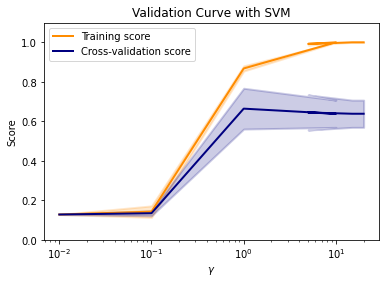

In [262]:
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_iris
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

X,y = X_train_pca,y_train
param_range = [20,15,5, 10, 1.0, 0.1, 0.01]

train_scores, test_scores = validation_curve(
    SVC(), X, y, param_name="C", param_range=param_range,
    scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

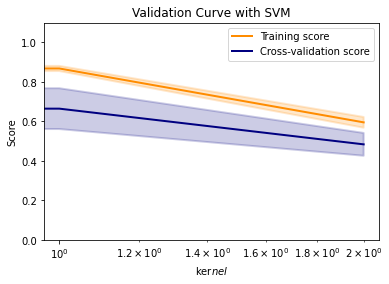

In [203]:
from sklearn.model_selection import validation_curve
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

X,y = X_train_pca,y_train
param_range = ['poly', 'rbf', 'sigmoid']

train_scores, test_scores = validation_curve(
    SVC(), X, y, param_name="kernel", param_range=param_range,
    scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with SVM")
plt.xlabel(r"$\kernel$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

Plotting Learning curve

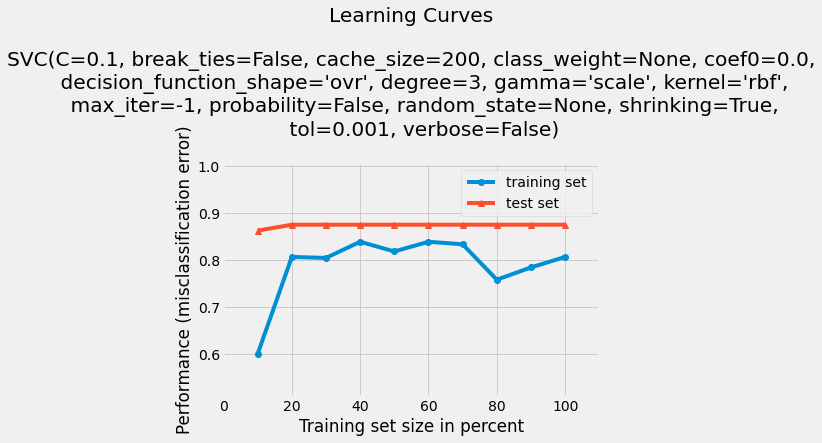

In [243]:
from mlxtend.plotting import plot_learning_curves
import matplotlib.pyplot as plt
from mlxtend.data import iris_data
from mlxtend.preprocessing import shuffle_arrays_unison
from sklearn.svm import SVC
import numpy as np


# Loading some example data
X_train, X_test = X_train_pca,X_val_pca
y_tr, y_test = y_train,y_val

clf = SVC(C=5, gamma= 'scale', kernel='rbf')

plot_learning_curves(X_train, y_tr, X_test, y_test, clf)
plt.show()

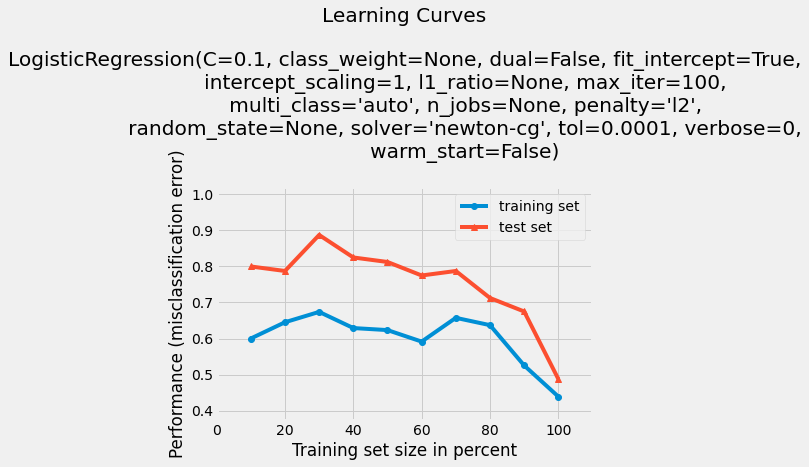

In [242]:
from mlxtend.plotting import plot_learning_curves
import matplotlib.pyplot as plt
from mlxtend.data import iris_data
from mlxtend.preprocessing import shuffle_arrays_unison
from sklearn.linear_model import LogisticRegression
import numpy as np


# Loading some example data
X_train, X_test = X_train_pca,X_val_pca
y_tr, y_test = y_train,y_val

clf = LogisticRegression(C= .1, penalty= 'l2', solver= 'newton-cg')

plot_learning_curves(X_train, y_tr, X_test, y_test, clf )
plt.show()

Training on final model

In [0]:
# concatingnating train and validation data
import numpy as np
X_final_train = np.concatenate([X_train_pca,X_val_pca])
X_final_train.shape
y_final_train = np.concatenate([y_train,y_val])

**Logistic regression**

In [0]:
lr = LogisticRegression(C= .1, penalty= 'l2', solver= 'newton-cg')
lr.fit(X_final_train,y_final_train)
y_pred_lr = lr.predict(X_final_test_pca)

In [246]:
print("Accuracy on overall test set is:", metrics.accuracy_score(y_final_test,y_pred_lr))

Accuracy on overall test set is: 0.46835443037974683


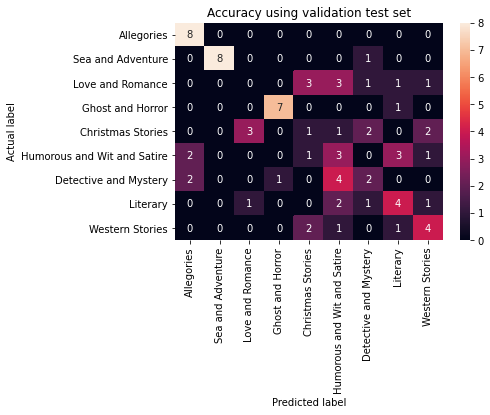

In [247]:
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_final_test, y_pred_lr)
sns.heatmap(cm, annot=True , xticklabels=train_data.genre.unique(), yticklabels=train_data.genre.unique())
plt.title('Accuracy using validation test set'.format(accuracy_score(y_final_test, y_pred_lr)))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [248]:
print(classification_report(y_final_test, y_pred_lr))

                             precision    recall  f1-score   support

                 Allegories       0.67      1.00      0.80         8
          Christmas Stories       1.00      0.89      0.94         9
      Detective and Mystery       0.00      0.00      0.00         9
           Ghost and Horror       0.88      0.88      0.88         8
Humorous and Wit and Satire       0.14      0.11      0.12         9
                   Literary       0.21      0.30      0.25        10
           Love and Romance       0.29      0.22      0.25         9
          Sea and Adventure       0.40      0.44      0.42         9
            Western Stories       0.44      0.50      0.47         8

                   accuracy                           0.47        79
                  macro avg       0.45      0.48      0.46        79
               weighted avg       0.44      0.47      0.45        79



**LR with weights**

In [0]:
lr = LogisticRegression(class_weight='balanced',C= .1, penalty= 'l2', solver= 'newton-cg')
lr.fit(X_final_train,y_final_train)
y_pred_lr = lr.predict(X_final_test_pca)

In [250]:
print("Accuracy on overall test set is:", metrics.accuracy_score(y_final_test,y_pred_lr))

Accuracy on overall test set is: 0.5189873417721519


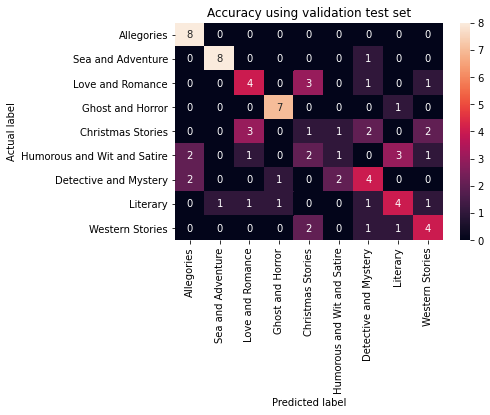

In [251]:
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_final_test, y_pred_lr)
sns.heatmap(cm, annot=True , xticklabels=train_data.genre.unique(), yticklabels=train_data.genre.unique())
plt.title('Accuracy using validation test set'.format(accuracy_score(y_final_test, y_pred_lr)))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [252]:
print(classification_report(y_final_test, y_pred_lr))

                             precision    recall  f1-score   support

                 Allegories       0.67      1.00      0.80         8
          Christmas Stories       0.89      0.89      0.89         9
      Detective and Mystery       0.44      0.44      0.44         9
           Ghost and Horror       0.78      0.88      0.82         8
Humorous and Wit and Satire       0.12      0.11      0.12         9
                   Literary       0.25      0.10      0.14        10
           Love and Romance       0.40      0.44      0.42         9
          Sea and Adventure       0.44      0.44      0.44         9
            Western Stories       0.44      0.50      0.47         8

                   accuracy                           0.52        79
                  macro avg       0.49      0.53      0.51        79
               weighted avg       0.49      0.52      0.49        79



**SVM**

In [0]:
from sklearn.svm import SVC
lr = SVC(C=.1, gamma= 'scale', kernel='rbf')
lr.fit(X_final_train,y_final_train)
y_pred_lr = lr.predict(X_final_test_pca)

In [254]:
print("Accuracy on overall test set is:", metrics.accuracy_score(y_final_test,y_pred_lr))

Accuracy on overall test set is: 0.20253164556962025


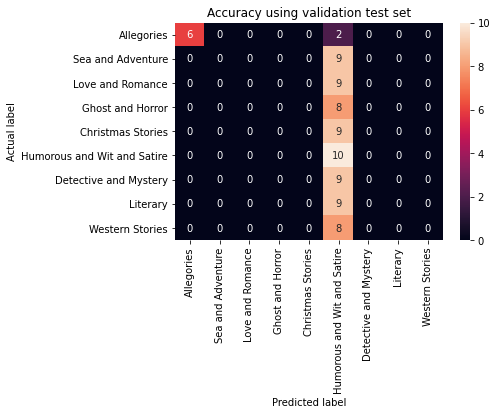

In [255]:
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_final_test, y_pred_lr)
sns.heatmap(cm, annot=True , xticklabels=train_data.genre.unique(), yticklabels=train_data.genre.unique())
plt.title('Accuracy using validation test set'.format(accuracy_score(y_final_test, y_pred_lr)))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [256]:
print(classification_report(y_final_test, y_pred_lr))

                             precision    recall  f1-score   support

                 Allegories       1.00      0.75      0.86         8
          Christmas Stories       0.00      0.00      0.00         9
      Detective and Mystery       0.00      0.00      0.00         9
           Ghost and Horror       0.00      0.00      0.00         8
Humorous and Wit and Satire       0.00      0.00      0.00         9
                   Literary       0.14      1.00      0.24        10
           Love and Romance       0.00      0.00      0.00         9
          Sea and Adventure       0.00      0.00      0.00         9
            Western Stories       0.00      0.00      0.00         8

                   accuracy                           0.20        79
                  macro avg       0.13      0.19      0.12        79
               weighted avg       0.12      0.20      0.12        79



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
#SVM with balanced class weights

In [0]:
from sklearn.svm import SVC
lr = SVC(C=.1, gamma= 'scale', kernel='rbf', class_weight = 'balanced')
lr.fit(X_final_train,y_final_train)
y_pred_lr = lr.predict(X_final_test_pca)

In [259]:
print("Accuracy on overall test set is:", metrics.accuracy_score(y_final_test,y_pred_lr))

Accuracy on overall test set is: 0.4430379746835443


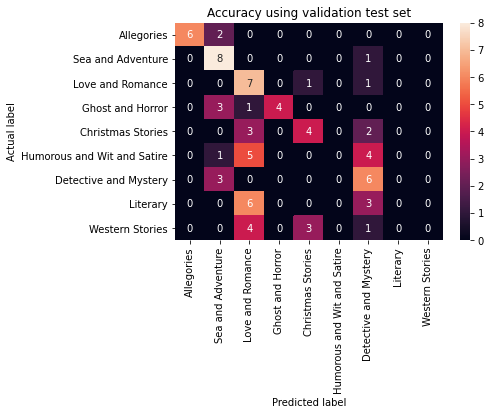

In [260]:
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_final_test, y_pred_lr)
sns.heatmap(cm, annot=True , xticklabels=train_data.genre.unique(), yticklabels=train_data.genre.unique())
plt.title('Accuracy using validation test set'.format(accuracy_score(y_final_test, y_pred_lr)))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [261]:
print(classification_report(y_final_test, y_pred_lr))

                             precision    recall  f1-score   support

                 Allegories       1.00      0.75      0.86         8
          Christmas Stories       0.47      0.89      0.62         9
      Detective and Mystery       0.27      0.78      0.40         9
           Ghost and Horror       1.00      0.50      0.67         8
Humorous and Wit and Satire       0.50      0.44      0.47         9
                   Literary       0.00      0.00      0.00        10
           Love and Romance       0.33      0.67      0.44         9
          Sea and Adventure       0.00      0.00      0.00         9
            Western Stories       0.00      0.00      0.00         8

                   accuracy                           0.44        79
                  macro avg       0.40      0.45      0.38        79
               weighted avg       0.38      0.44      0.37        79



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
